### Importing dependencies and text preprocessing modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  #### SQL Interface
import pickle   ### Used to save your data - Converts objects to byte stream and vice versa
import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


### Reading the cleaned sqlite file. 
###### (cleanning process show in previous file.)

In [3]:
conn = sqlite3.connect("final.sqlite")
final = pd.read_sql_query("""SELECT * FROM Reviews""" , conn)
conn.close()
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confect around centuri light pillowi citrus ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,got wild hair taffi order five pound bag taffi...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,saltwat taffi great flavor soft chewi candi in...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,1,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,taffi good soft chewi flavor amaz would defini...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,1,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,right most sprout cat eat grass love rotat aro...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,healthi dog food good digest also good small p...


In [4]:
data = final[["Time" , "Score" , "CleanedText"]].copy()
data.sort_values("Time", inplace = True)
data.head(10)

,Time,Score,CleanedText
117879,939340800,1,witti littl book make son laugh loud recit car...
117856,940809600,1,rememb see show air televis year ago child sis...
298565,944092800,1,beetlejuic well written movi everyth excel act...
169198,944438400,1,twist rumplestiskin captur film star michael k...
298564,946857600,1,beetlejuic excel funni movi keaton hilari wack...
169259,947376000,1,one movi movi collect fill comedi action whate...
169184,948240000,0,alway enjoy movi funni entertain hesit pick cl...
63292,948672000,1,bought apart infest fruit fli hour trap quot a...
169284,951523200,1,happen say name three time michael keaten star...
298566,959990400,1,get crazi realli imposs today find french vhs ...


In [5]:
data["Score"].value_counts()

1    306779
0     57078
Name: Score, dtype: int64

In [6]:
del final

### Separating the target variable from the features:

In [8]:
x = data["CleanedText"]
y = data["Score"]


### Splitting the training and testing data:
(70:30 ratio)

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.3 , shuffle = False)


In [10]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((254699,), (109158,), (254699,), (109158,))

### Applying TFIDF vectorizer text preprocessing technique on training data:

In [11]:
tfid = TfidfVectorizer()
x_train = tfid.fit_transform(x_train.values)

In [12]:
x_train.shape

(254699, 63242)

### Applying TFIDF vectorizer text preprocessing technique on testing data:

In [13]:
x_test = tfid.transform(x_test.values)

In [14]:
x_test.shape

(109158, 63242)

### Performing cross validation to find the optimum value of alpha:

In [15]:
start = time.time()
alpha = np.linspace(1,10,10)
cv_score = [] 
for a in alpha:
    clf = MultinomialNB(alpha = a)
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())

cv_error = [1 - x for x in cv_score]

optimal_alpha = alpha[cv_error.index(min(cv_error))]
print('\nThe optimal alpha is', optimal_alpha)

end = time.time()
print("Total time in minutes = ", (end-start)/60)


The optimal alpha is 1.0
Total time in minutes =  0.6404175202051798


### Plotting the optimum value of alpha:

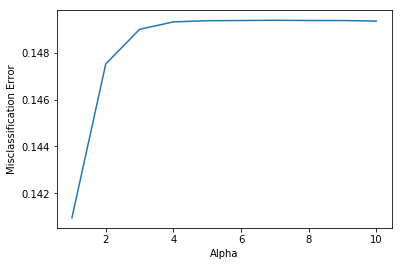

In [16]:
plt.plot(alpha, cv_error)
plt.xlabel('Alpha')
plt.ylabel('Misclassification Error')
plt.show()

### Displaying the output prediction using optimum value of alpha:

In [17]:
clf = MultinomialNB(alpha = optimal_alpha)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 83.9269682478609


array([[ 1601, 17465],
       [   80, 90012]], dtype=int64)

### Listing the top 50 negative and positive words respectively:

In [18]:
idx = (-clf.feature_log_prob_).argsort()[:2,:50]
print("Top 50 words in negative reviews")
for i in idx[0]:
    print(tfid.get_feature_names()[i])
    
print("\n******************************************\n")
print("Top 50 words in positive reviews")
for i in idx[1]:
    print(tfid.get_feature_names()[i])

Top 50 words in negative reviews
tast
like
product
would
flavor
coffe
one
tri
buy
order
box
tea
disappoint
good
get
use
even
bad
food
bag
amazon
purchas
bought
packag
much
realli
eat
look
review
chocol
money
time
dog
cup
receiv
item
thought
price
smell
make
better
want
think
could
first
got
know
say
love
made

******************************************

Top 50 words in positive reviews
great
love
tast
good
like
tea
flavor
coffe
product
use
one
tri
make
get
price
best
buy
amazon
food
find
order
time
realli
eat
store
dog
would
much
littl
chocol
drink
also
well
bag
cup
mix
delici
better
recommend
year
sweet
treat
sugar
day
favorit
free
even
snack
high
enjoy


### Conclusion:
- Thus from the above model interpretation it can be rightly said that out of the total 306779 positive points 90012 points were classified as true positive and out of  57078 negative points  1601were classified as true Negative.Thus the accuracy of our model come out to be 83%.